In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential,load_model
from sklearn import model_selection
from os import listdir
from os.path import isfile, join
import tensorflow as tf
from skimage.io import imread
import cv2
import re
import glob
from sklearn import preprocessing

In [1]:
import os
dir = os.path.dirname
src_path = dir(os.path.abspath(''))

In [2]:
path_train = src_path + os.sep + "data" +  os.sep + "train"  +  os.sep + '**'  +  os.sep + '**.jpg'
path_train

'c:\\Users\\Mary\\Desktop\\BootCamp\\Python\\MaryC-MezaR\\data_science_bootcamp_2021\\Machine_Learning_project\\data\\train\\**\\**.jpg'

In [3]:
path = src_path + os.sep + "data"
path

'c:\\Users\\Mary\\Desktop\\BootCamp\\Python\\MaryC-MezaR\\data_science_bootcamp_2021\\Machine_Learning_project\\data'

In [ ]:
import glob
import pandas as pd



def make_imag_df(path):
    dictionary = {}
    for paths in glob.glob(path):
        dictionary.setdefault('path_train', []).append(paths.split('/')[-3])
        dictionary.setdefault('name', []).append(paths.split('/')[-2])
        dictionary.setdefault('id', []).append(paths.split('/')[-1][:-4])
        dictionary.setdefault('img', []).append(paths.split('/')[-1])
        
    images = pd.DataFrame(dictionary)
    return images

train_set = make_imag_df(path_train)

In [ ]:
#funcion columna
def creat_colum (dataframe):
    le = preprocessing.LabelEncoder()
    dataframe['path']= dataframe.name + "/" + dataframe.img
    dataframe['label']= le.fit_transform(dataframe.name)

    return dataframe

In [ ]:
train_set = creat_colum (train_set)

In [ ]:
train_set

,path_train,name,id,img,path,label
0,train,metal,metal178,metal178.jpg,metal/metal178.jpg,4
1,train,metal,metal444,metal444.jpg,metal/metal444.jpg,4
2,train,metal,metal81,metal81.jpg,metal/metal81.jpg,4
3,train,metal,metal11,metal11.jpg,metal/metal11.jpg,4
4,train,metal,metal472,metal472.jpg,metal/metal472.jpg,4
...,...,...,...,...,...,...
4907,train,trash,trash80,trash80.jpg,trash/trash80.jpg,7
4908,train,trash,trash98,trash98.jpg,trash/trash98.jpg,7
4909,train,trash,trash85,trash85.jpg,trash/trash85.jpg,7
4910,train,trash,trash91,trash91.jpg,trash/trash91.jpg,7


In [ ]:
path_path = '/content/gdrive/MyDrive/ML_Project/data/train' +  "/" 
path_path

'/content/gdrive/MyDrive/ML_Project/data/train/'

In [ ]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
path = '/content/gdrive/MyDrive/ML_Project/data/train'

In [ ]:
classes = []
for d in os.listdir(path):
    if os.path.isdir(os.path.join(path, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)  

There are  8 classes:
 ['metal', 'battery', 'biological', 'glass', 'cardboard', 'paper', 'plastic', 'trash']


Let's verify there are not any corrupt images that cannot be read. If found any, they will simply be deleted.

In [ ]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(path, c), delete=True);

Class: metal


Class: battery


Class: biological


Class: glass


Class: cardboard


Class: paper


Class: plastic


Class: trash


Creating and training the classifier

Let's split our dataset to 80% for training and 20% for validation,

In [ ]:
data  = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


In [ ]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 3930 training images and 982 validation images.


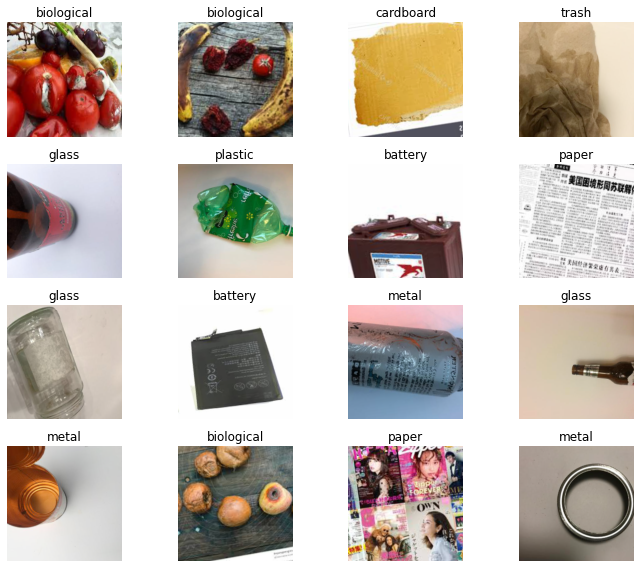

In [ ]:
data.show_batch(rows=4,figsize=(10,8))

Build our Deep Convolutional Neural Network (CNN)

In [ ]:
data

ImageDataBunch;

Train: LabelList (3930 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
metal,metal,metal,metal,metal
Path: /content/gdrive/MyDrive/ML_Project/data/train;

Valid: LabelList (982 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
glass,cardboard,glass,plastic,biological
Path: /content/gdrive/MyDrive/ML_Project/data/train;

Test: None

Model training

Case1: use resnet34 for training

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Let's now pick the appropriate learning rate parameter

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


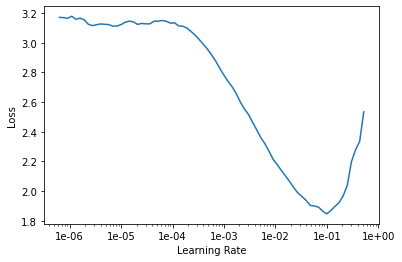

In [ ]:
learn.lr_find();
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.824153,0.447897,0.876782,00:46
1,0.555891,0.297413,0.902240,00:46
2,0.375259,0.226244,0.929735,00:46
3,0.246125,0.199185,0.945010,00:46


we achieved a high classification accuracy of 0,94%

Results Interpretation and Visualization

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

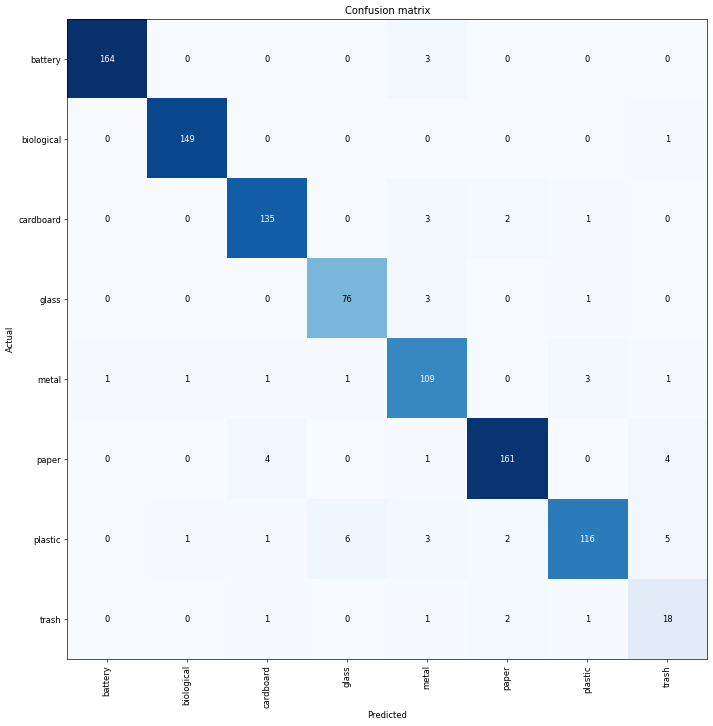

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In a confusion matrix, the diagonal elements represent the number of images for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

In [ ]:
interp.most_confused(min_val=2)

[('plastic', 'glass', 6),
 ('plastic', 'trash', 5),
 ('paper', 'cardboard', 4),
 ('paper', 'trash', 4),
 ('battery', 'metal', 3),
 ('cardboard', 'metal', 3),
 ('glass', 'metal', 3),
 ('metal', 'plastic', 3),
 ('plastic', 'metal', 3),
 ('cardboard', 'paper', 2),
 ('plastic', 'paper', 2),
 ('trash', 'paper', 2)]

ClassificationInterpretation provides a visualization of the misclassfied images.

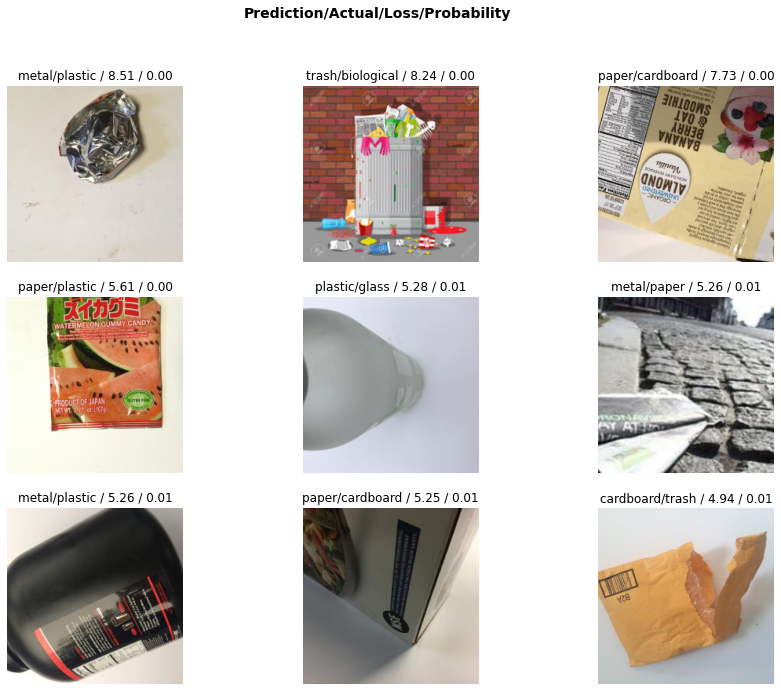

In [ ]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

Testing the model on a new image

It is a biological


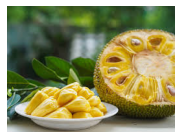

In [ ]:
path_test = src_path + os.sep + "data" +  os.sep + "test" #The path of your test image
img = open_image(get_image_files(path_test)[1])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

It is a cardboard
It is a biological
It is a biological
It is a biological
It is a biological
It is a cardboard
It is a biological
It is a biological
It is a biological
It is a biological


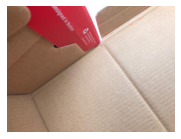

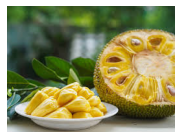

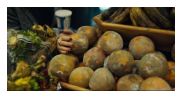

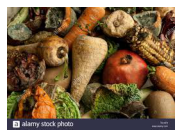

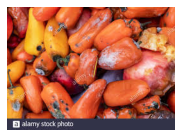

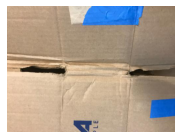

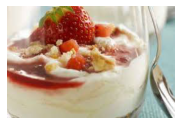

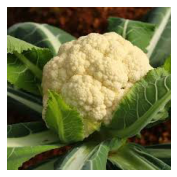

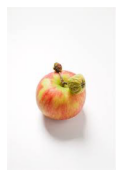

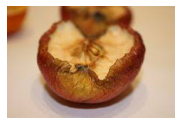

In [ ]:
for i in range(10):
  img = open_image(get_image_files(path_test)[i])
  pred_class,pred_idx,outputs = learn.predict(img)
  img.show()
  print ("It is a", pred_class)